In [1]:
import os
from glob import glob
import cv2
from matplotlib import pyplot as plt

In [2]:
# CRAFT 모델을 거치고 결과 파일들이 저장된 폴더를 경로로 지정합니다.
file_path = '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result'

# CRAFT 모델의 input으로 사용한 image file이 존재하는 폴더를 경로로 지정합니다.
# image_path = '/opt/ml/final-project-level3-cv-16/data'
image_path = '/opt/ml/final-project-level3-cv-16/deep-text-recognition-benchmark/demo_image'

# CRAFT 모델을 거치고 나온 결과 파일들 중 BBOX가 기록되어있는 txt file들만 불러옵니다.
annotations = glob(os.path.join(file_path, '*.txt'))
annotations = sorted(annotations)
print(annotations)

['/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result/res_200101951_front_no_aug.txt', '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result/res_200102789_front_no_aug.txt', '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result/res_200103029_front_no_aug.txt', '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result/res_200308619_front_no_aug.txt', '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result/res_200808280_front_no_aug.txt', '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result/res_200808340_front_no_aug.txt', '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result/res_200808340_front_rotated.txt', '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result/res_B_CLAHE_crop.txt', '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result/res_B_no_aug_crop.txt', '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result/res_C B_CLAHE.txt', '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch/result/res_C B_CannyEdge.txt', '/opt/ml/final-project-level3-cv-16/CRAFT-pytorch

200101951_front_no_aug
200101951_front_no_aug
200102789_front_no_aug
200103029_front_no_aug
200103029_front_no_aug
200808280_front_no_aug
200808340_front_rotated
200808340_front_rotated
C B_no_aug
CFC_no_aug
dw_CFC_CLAHE
dw_CFC_CLAHE
dw_CFC_CLAHE
dw_CFC_CLAHE
dw_CFC_CLAHE
dw_CFC_CLAHE
dw_CFC_CLAHE
dw_CFC_CLAHE
dw_CFC_CLAHE
dw_CFC_CLAHE
dw_CFC_CLAHE
dw_CFC_no_aug
dw_CFC_no_aug
korean_no_aug
korean_no_aug
korean_no_aug_crop


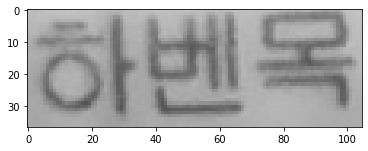

In [3]:
# 저장되어있는 모든 annotation file에 대해서 진행합니다.
for anno_path in annotations:
    
    # file_name에 대해 전처리를 진행합니다.
    file_name = anno_path.split('/')[-1]
    file_name = '_'.join(file_name.split('_')[1:]).rstrip('.txt')
    
    # annotation file의 내용을 불러옵니다.
    f = open(anno_path, 'r')
    bboxes = f.readline()
    
    # annotation file에 BBOX 정보가 더이상 없을 때까지 진행합니다.
    while bboxes != '':
        print(file_name)
        # BBOX의 x좌표 및 y좌표를 각각의 리스트에 담습니다.
        x_values = list(map(int, bboxes.split(',')[0::2]))
        y_values = list(map(int, bboxes.split(',')[1::2]))
        
        # 각 x좌표 및 y좌표에 대해 최대 및 최소 값을 구합니다.
        x_min = min(x_values)
        x_max = max(x_values)
        y_min = min(y_values)
        y_max = max(y_values)
    
        # 원본 이미지(알약이 crop되어 있는)를 불러오고 x좌표와 y좌표의 최대 및 최소 값을 이용하여 이미지를 crop합니다.
        image = cv2.imread(os.path.join(image_path, file_name + '.png'))
        cropped_image = image[y_min:y_max+1, x_min:x_max+1]
        plt.imshow(cropped_image)
        
        bboxes = f.readline()